In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plot
import seaborn as sns
from sklearn.utils import resample
from imblearn.over_sampling import SMOTENC,RandomOverSampler,KMeansSMOTE
from sklearn.impute import KNNImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
sns.set()

In [78]:
data  = pd.read_csv('hypothyroid.csv')

In [79]:
data.shape

(3772, 30)

In [80]:
data.rename(columns = { 'sex':'gender'}, inplace = True)

In [81]:
data.head(16)

,age,gender,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG,referral_source,Class
0,41,F,f,f,f,f,f,f,f,f,...,t,125,t,1.14,t,109,f,?,SVHC,negative
1,23,F,f,f,f,f,f,f,f,f,...,t,102,f,?,f,?,f,?,other,negative
2,46,M,f,f,f,f,f,f,f,f,...,t,109,t,0.91,t,120,f,?,other,negative
3,70,F,t,f,f,f,f,f,f,f,...,t,175,f,?,f,?,f,?,other,negative
4,70,F,f,f,f,f,f,f,f,f,...,t,61,t,0.87,t,70,f,?,SVI,negative
5,18,F,t,f,f,f,f,f,f,f,...,t,183,t,1.3,t,141,f,?,other,negative
6,59,F,f,f,f,f,f,f,f,f,...,t,72,t,0.92,t,78,f,?,other,negative
7,80,F,f,f,f,f,f,f,f,f,...,t,80,t,0.7,t,115,f,?,SVI,negative
8,66,F,f,f,f,f,f,f,f,f,...,t,123,t,0.93,t,132,f,?,SVI,negative
9,68,M,f,f,f,f,f,f,f,f,...,t,83,t,0.89,t,93,f,?,SVI,negative


Problem Statement :  To build a classification methodology to predict the type of Thyroid a person has ,based on the below features.

age - Age of the person

gender - Male or Female

on_thyroxine - true or false

on_antithyroid_medication - true or false

sick - true or false

pregnant - true or false

thyroid_surgery - true or false

I131_treatment - true or false

query_hypothyroid - true or false

query_hyperthyroid -true or false

lithium - true or false

goitre - true or false

tumor - true or false

hypopituitary- true or false

psych - true or false

TSH_measured - true or false

TSH - thyroid stimulating hormone floating value

T3_measured - true or false

T3 - triiodothyronine value

TT4_measured- true or false

TT4 - Thyroxine value

T4U_measured- true or false

T4U - numerical value

FTI_measured- true or false

FTI -Free Thyroxine Index

TBG_measured- true or false

TBG -Thyroid-Binding Globulin  value

referral_source - different sources of referals

Class - different types of thyroid

In [82]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3772 entries, 0 to 3771
Data columns (total 30 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   age                        3772 non-null   object
 1   gender                     3772 non-null   object
 2   on_thyroxine               3772 non-null   object
 3   query_on_thyroxine         3772 non-null   object
 4   on_antithyroid_medication  3772 non-null   object
 5   sick                       3772 non-null   object
 6   pregnant                   3772 non-null   object
 7   thyroid_surgery            3772 non-null   object
 8   I131_treatment             3772 non-null   object
 9   query_hypothyroid          3772 non-null   object
 10  query_hyperthyroid         3772 non-null   object
 11  lithium                    3772 non-null   object
 12  goitre                     3772 non-null   object
 13  tumor                      3772 non-null   object
 14  hypopitu

In [83]:
data.describe()

,age,gender,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG,referral_source,Class
count,3772,3772,3772,3772,3772,3772,3772,3772,3772,3772,...,3772,3772,3772,3772,3772,3772,3772,3772,3772,3772
unique,94,3,2,2,2,2,2,2,2,2,...,2,242,2,147,2,235,1,1,5,4
top,59,F,f,f,f,f,f,f,f,f,...,t,?,t,?,t,?,f,?,other,negative
freq,95,2480,3308,3722,3729,3625,3719,3719,3713,3538,...,3541,231,3385,387,3387,385,3772,3772,2201,3481


In [84]:
for column in data.columns:
    count = data[column][data[column]=='?'].count()
    if count!=0:
        print(column, data[column][data[column]=='?'].count())
    

age 1
gender 150
TSH 369
T3 769
TT4 231
T4U 387
FTI 385
TBG 3772


In [85]:
data = data.drop(['TBG'],axis =1)

In [86]:
data[['T4U_measured','T4U']] 

,T4U_measured,T4U
0,t,1.14
1,f,?
2,t,0.91
3,f,?
4,t,0.87
...,...,...
3767,f,?
3768,t,1.08
3769,t,1.07
3770,t,0.94


In [87]:
data = data.drop(['TSH_measured','T3_measured','TT4_measured','T4U_measured','FTI_measured','TBG_measured'],axis =1)

In [88]:
# Now let's replace the '?' values with numpy nan
for column in data.columns:
    count = data[column][data[column]=='?'].count()
    if count!=0:
        data[column] = data[column].replace('?',np.nan)    

In [89]:
for column in data.columns:
    count = data[column][data[column]=='?'].count()
    if count==0:
        print(column, data[column][data[column]=='?'].count())    

age 0
gender 0
on_thyroxine 0
query_on_thyroxine 0
on_antithyroid_medication 0
sick 0
pregnant 0
thyroid_surgery 0
I131_treatment 0
query_hypothyroid 0
query_hyperthyroid 0
lithium 0
goitre 0
tumor 0
hypopituitary 0
psych 0
TSH 0
T3 0
TT4 0
T4U 0
FTI 0
referral_source 0
Class 0


In [90]:
data=data.astype({'age':'float','T3':'float','TT4':'float','T4U':'float','FTI':'float'})

In [91]:
data.isna().sum()

age                            1
gender                       150
on_thyroxine                   0
query_on_thyroxine             0
on_antithyroid_medication      0
sick                           0
pregnant                       0
thyroid_surgery                0
I131_treatment                 0
query_hypothyroid              0
query_hyperthyroid             0
lithium                        0
goitre                         0
tumor                          0
hypopituitary                  0
psych                          0
TSH                          369
T3                           769
TT4                          231
T4U                          387
FTI                          385
referral_source                0
Class                          0
dtype: int64

In [92]:
for column in data.columns:
    print(column,(data[column].unique()))

age [ 41.  23.  46.  70.  18.  59.  80.  66.  68.  84.  67.  71.  28.  65.
  42.  63.  51.  81.  54.  55.  60.  25.  73.  34.  78.  37.  85.  26.
  58.  64.  44.  48.  61.  35.  83.  21.  87.  53.  77.  27.  69.  74.
  38.  76.  45.  36.  22.  43.  72.  82.  31.  39.  49.  62.  57.   1.
  50.  30.  29.  75.  19.   7.  79.  17.  24.  15.  32.  47.  16.  52.
  33.  13.  10.  89.  56.  20.  90.  40.  88.  14.  86.  94.  12.   4.
  11.   8.   5. 455.   2.  91.   6.  nan  93.  92.]
gender ['F' 'M' nan]
on_thyroxine ['f' 't']
query_on_thyroxine ['f' 't']
on_antithyroid_medication ['f' 't']
sick ['f' 't']
pregnant ['f' 't']
thyroid_surgery ['f' 't']
I131_treatment ['f' 't']
query_hypothyroid ['f' 't']
query_hyperthyroid ['f' 't']
lithium ['f' 't']
goitre ['f' 't']
tumor ['f' 't']
hypopituitary ['f' 't']
psych ['f' 't']
TSH ['1.3' '4.1' '0.98' '0.16' '0.72' '0.03' nan '2.2' '0.6' '2.4' '1.1' '2.8'
 '3.3' '12' '1.2' '1.5' '6' '2.1' '0.1' '0.8' '1.9' '3.1' '0.2' '13' '0.3'
 '0.035' '2.5' '0.5' '

In [93]:
data['gender']=data['gender'].map({'F':0,'M':1})

In [94]:
for column in data.columns:
    if len(data[column].unique())==2:
        data[column]=data[column].map({'f':0,'t':1})

In [95]:
for column in data.columns:
    print(column,(data[column].unique()))

age [ 41.  23.  46.  70.  18.  59.  80.  66.  68.  84.  67.  71.  28.  65.
  42.  63.  51.  81.  54.  55.  60.  25.  73.  34.  78.  37.  85.  26.
  58.  64.  44.  48.  61.  35.  83.  21.  87.  53.  77.  27.  69.  74.
  38.  76.  45.  36.  22.  43.  72.  82.  31.  39.  49.  62.  57.   1.
  50.  30.  29.  75.  19.   7.  79.  17.  24.  15.  32.  47.  16.  52.
  33.  13.  10.  89.  56.  20.  90.  40.  88.  14.  86.  94.  12.   4.
  11.   8.   5. 455.   2.  91.   6.  nan  93.  92.]
gender [ 0.  1. nan]
on_thyroxine [0 1]
query_on_thyroxine [0 1]
on_antithyroid_medication [0 1]
sick [0 1]
pregnant [0 1]
thyroid_surgery [0 1]
I131_treatment [0 1]
query_hypothyroid [0 1]
query_hyperthyroid [0 1]
lithium [0 1]
goitre [0 1]
tumor [0 1]
hypopituitary [0 1]
psych [0 1]
TSH ['1.3' '4.1' '0.98' '0.16' '0.72' '0.03' nan '2.2' '0.6' '2.4' '1.1' '2.8'
 '3.3' '12' '1.2' '1.5' '6' '2.1' '0.1' '0.8' '1.9' '3.1' '0.2' '13' '0.3'
 '0.035' '2.5' '0.5' '1.7' '7.3' '1.8' '0.26' '45' '5.4' '0.99' '0.25'
 '0.92'

In [96]:
class1=list(data['Class'].unique())
class1

['negative',
 'compensated_hypothyroid',
 'primary_hypothyroid',
 'secondary_hypothyroid']

In [97]:
data=data.drop(labels=['referral_source'], axis=1)

In [98]:
lblen=OrdinalEncoder(categories=[class1],dtype=int)

data['Class']=lblen.fit_transform(data[['Class']])
data['Class']

0       0
1       0
2       0
3       0
4       0
       ..
3767    0
3768    0
3769    0
3770    0
3771    0
Name: Class, Length: 3772, dtype: int32

In [99]:
data.head()

,age,gender,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,goitre,tumor,hypopituitary,psych,TSH,T3,TT4,T4U,FTI,Class
0,41.0,0.0,0,0,0,0,0,0,0,0,...,0,0,0,0,1.3,2.5,125.0,1.14,109.0,0
1,23.0,0.0,0,0,0,0,0,0,0,0,...,0,0,0,0,4.1,2.0,102.0,NaN,NaN,0
2,46.0,1.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0.98,NaN,109.0,0.91,120.0,0
3,70.0,0.0,1,0,0,0,0,0,0,0,...,0,0,0,0,0.16,1.9,175.0,NaN,NaN,0
4,70.0,0.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0.72,1.2,61.0,0.87,70.0,0


In [100]:
data.describe(include='all')

,age,gender,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,goitre,tumor,hypopituitary,psych,TSH,T3,TT4,T4U,FTI,Class
count,3771.000000,3622.000000,3772.000000,3772.000000,3772.000000,3772.000000,3772.000000,3772.000000,3772.000000,3772.000000,...,3772.000000,3772.000000,3772.000000,3772.000000,3403,3003.000000,3541.000000,3385.000000,3387.000000,3772.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,287,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.2,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,116,NaN,NaN,NaN,NaN,NaN
mean,51.735879,0.315295,0.123012,0.013256,0.011400,0.038971,0.014051,0.014051,0.015642,0.062036,...,0.009014,0.025451,0.000265,0.048780,NaN,2.013500,108.319345,0.995000,110.469649,0.103393
std,20.084958,0.464698,0.328494,0.114382,0.106174,0.193552,0.117716,0.117716,0.124101,0.241253,...,0.094525,0.157510,0.016282,0.215437,NaN,0.827434,35.604248,0.195457,33.089698,0.382485
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,NaN,0.050000,2.000000,0.250000,2.000000,0.000000
25%,36.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,NaN,1.600000,88.000000,0.880000,93.000000,0.000000
50%,54.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,NaN,2.000000,103.000000,0.980000,107.000000,0.000000
75%,67.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,NaN,2.400000,124.000000,1.080000,124.000000,0.000000


In [101]:
print(data['Class'].unique())

[0 1 2 3]


In [102]:
imputer=KNNImputer(n_neighbors=3,weights='uniform',missing_values=np.nan)
new_array=imputer.fit_transform(data)


In [103]:
new_data=pd.DataFrame(data=np.round(new_array),columns=data.columns)
new_data

,age,gender,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,goitre,tumor,hypopituitary,psych,TSH,T3,TT4,T4U,FTI,Class
0,41.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,2.0,125.0,1.0,109.0,0.0
1,23.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,4.0,2.0,102.0,1.0,108.0,0.0
2,46.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,2.0,109.0,1.0,120.0,0.0
3,70.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,175.0,1.0,177.0,0.0
4,70.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,61.0,1.0,70.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3767,30.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,2.0,3.0,112.0,1.0,117.0,0.0
3768,68.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,2.0,124.0,1.0,114.0,0.0
3769,74.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,5.0,2.0,112.0,1.0,105.0,0.0
3770,72.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,2.0,82.0,1.0,87.0,0.0


In [104]:
new_data.isna().sum()

age                          0
gender                       0
on_thyroxine                 0
query_on_thyroxine           0
on_antithyroid_medication    0
sick                         0
pregnant                     0
thyroid_surgery              0
I131_treatment               0
query_hypothyroid            0
query_hyperthyroid           0
lithium                      0
goitre                       0
tumor                        0
hypopituitary                0
psych                        0
TSH                          0
T3                           0
TT4                          0
T4U                          0
FTI                          0
Class                        0
dtype: int64

C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level functi

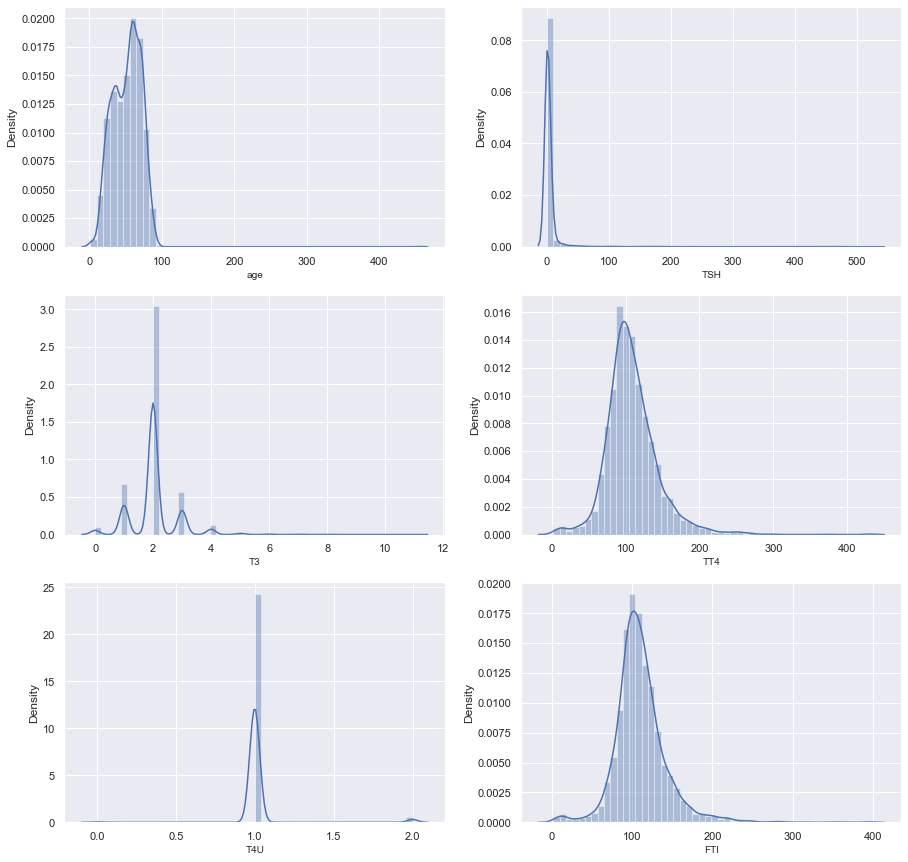

In [105]:
columns=['age','TSH','T3','TT4','T4U','FTI']

plot.figure(figsize=(15,15),facecolor='white')
plotnumber=1

for column in columns:
    ax=plot.subplot(3,2,plotnumber)
    sns.distplot(new_data[column])
    plot.xlabel(column,fontsize=10)
    plotnumber+=1
plot.show()

C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level functi

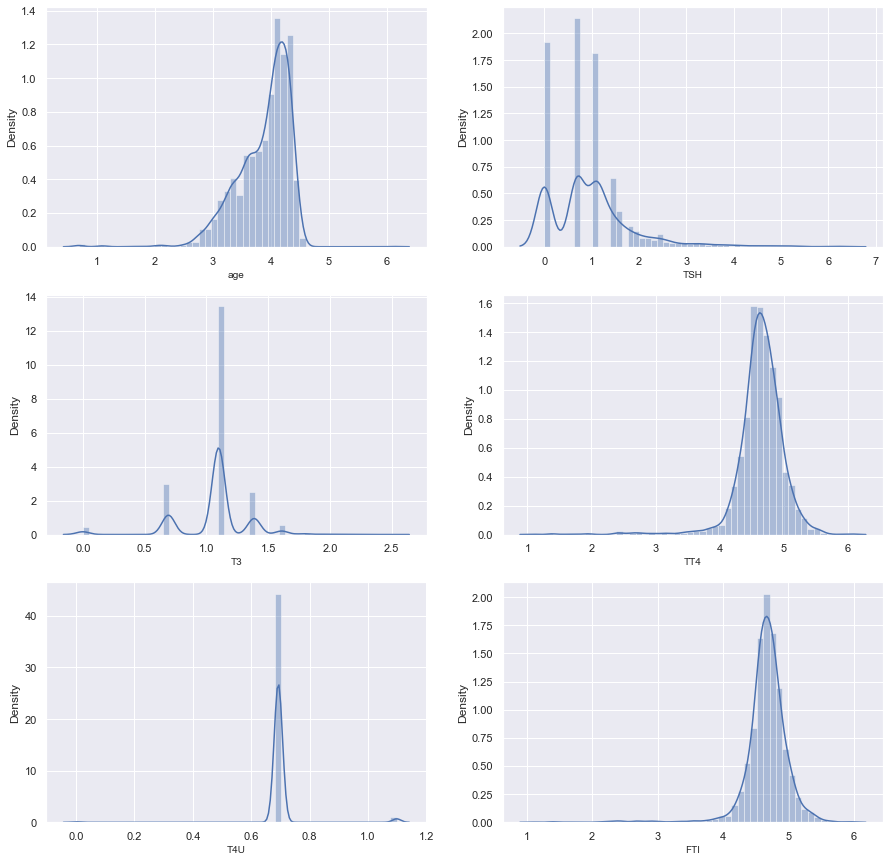

In [106]:
columns=['age','TSH','T3','TT4','T4U','FTI']

plot.figure(figsize=(15,15),facecolor='white')
plotnumber=1

for column in columns:
    new_data[column]+=1
    
    ax=plot.subplot(3,2,plotnumber)
    sns.distplot(np.log(new_data[column]))
    plot.xlabel(column,fontsize=10)
    plotnumber+=1
plot.show()

In [107]:
new_data=new_data.drop(['TSH'],axis=1)


In [108]:
new_data.shape

(3772, 21)

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Class', ylabel='count'>

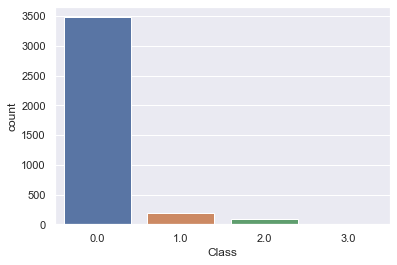

In [109]:
sns.countplot(new_data['Class'])

In [110]:
x=new_data.drop(['Class'],axis=1)
y=new_data['Class']
rdsample=RandomOverSampler()
x_sampled,y_sampled=rdsample.fit_resample(x,y)

In [111]:
x_sampled.shape

(13924, 20)

In [112]:
x_sampled=pd.DataFrame(data=x_sampled,columns=x.columns)

In [113]:
list(x_sampled.columns)

['age',
 'gender',
 'on_thyroxine',
 'query_on_thyroxine',
 'on_antithyroid_medication',
 'sick',
 'pregnant',
 'thyroid_surgery',
 'I131_treatment',
 'query_hypothyroid',
 'query_hyperthyroid',
 'lithium',
 'goitre',
 'tumor',
 'hypopituitary',
 'psych',
 'T3',
 'TT4',
 'T4U',
 'FTI']

In [114]:
x_sampled

,age,gender,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,query_hyperthyroid,lithium,goitre,tumor,hypopituitary,psych,T3,TT4,T4U,FTI
0,42.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,126.0,2.0,110.0
1,24.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,103.0,2.0,109.0
2,47.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,110.0,2.0,121.0
3,71.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,176.0,2.0,178.0
4,71.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,62.0,2.0,71.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13919,42.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,23.0,2.0,58.0
13920,47.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,49.0,2.0,55.0
13921,42.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,23.0,2.0,58.0
13922,47.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,49.0,2.0,55.0


In [115]:
13924/4

3481.0

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Class', ylabel='count'>

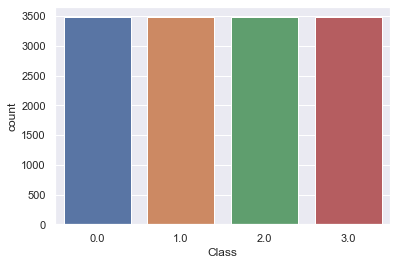

In [116]:
sns.countplot(y_sampled)

In [117]:
#dataset balanced

Splitting into train and test data

In [118]:
#Importing train_test_split to split into traning and testing data.
from sklearn.model_selection import train_test_split

#Importing Randomforestclassifier to create a model.
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

#Importing Accuracy score and classification report to check the accuracy.
from sklearn.metrics import classification_report, accuracy_score,roc_auc_score, plot_roc_curve
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report

#Importing the kfold and cross validation.
from sklearn.model_selection import KFold, cross_val_score

In [119]:
X_train, X_test, y_train, y_test = train_test_split(x_sampled, y_sampled, test_size=0.20, random_state=42)

In [120]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(11139, 20)
(2785, 20)
(11139,)
(2785,)


In [121]:
models = {
          "KNeighborsClassifier": KNeighborsClassifier(),
          "RandomForestClassifier": RandomForestClassifier(),
          "DecisionTree": DecisionTreeClassifier(random_state=0)}

def fit_and_score(models, X_train, X_test, y_train, y_test):
    np.random.seed(99)
    model_scores = {}
    for name, model in models.items():
        model.fit(X_train, y_train)
        model_scores[name] = model.score(X_test, y_test)
    
    return model_scores

model_scores = fit_and_score(models, X_train, X_test, y_train, y_test)

model_scores

{'KNeighborsClassifier': 0.9457809694793536,
 'RandomForestClassifier': 0.992818671454219,
 'DecisionTree': 0.984560143626571}

In [122]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

In [123]:
# Predicting using testing data
y_pred = rf.predict(X_test)


In [124]:
 accuracy_score(y_test, y_pred)

0.9913824057450629

In [125]:
rf.score(X_train, y_train)

1.0

In [126]:
rf.score(X_test, y_test)

0.9913824057450629

In [127]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       1.00      0.97      0.98       689
         1.0       0.97      1.00      0.99       719
         2.0       1.00      1.00      1.00       687
         3.0       1.00      1.00      1.00       690

    accuracy                           0.99      2785
   macro avg       0.99      0.99      0.99      2785
weighted avg       0.99      0.99      0.99      2785



In [128]:
a_data=x_sampled.iloc[15].to_numpy() 
a_data

input_a_data=a_data.reshape(1,-1)

prediction=rf.predict(input_a_data)
print(prediction)

if(prediction[0]==0):
    print('The person has no thyroid')
elif(prediction[0]==1):
    print('The person has Compensated Hypothyroid')
elif(prediction[0]==2):
    print('The person has Primary Hypothyroid')
else:
    print('The person has Secondary Hypothyroid')

[1.]
The person has Compensated Hypothyroid


saving the trained model

In [129]:
import pickle 
filename='trained_thyroid_model.sav'
pickle.dump(rf,open(filename,'wb'))


In [130]:
#loading the saved model
loaded_model=pickle.load(open('trained_thyroid_model.sav','rb'))

In [131]:
a_data=x_sampled.iloc[15].to_numpy() 
a_data

input_data=a_data.reshape(1,-1)

prediction=loaded_model.predict(input_data)
print(prediction)

if(prediction[0]==0):
    print('The person has no thyroid')
elif(prediction[0]==1):
    print('The person has Compensated Hypothyroid')
elif(prediction[0]==2):
    print('The person has Primary Hypothyroid')
else:
    print('The person has Secondary Hypothyroid')

[1.]
The person has Compensated Hypothyroid
